# Neo Price

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/raw/bitcoin/neo_price.csv')

In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
357,"Sep 13, 2016",0.374469,0.375092,0.301766,0.309509,"3,337",-
358,"Sep 12, 2016",0.376312,0.376671,0.360443,0.374598,"1,116",-
359,"Sep 11, 2016",0.390948,0.398459,0.372790,0.376150,879,-
360,"Sep 10, 2016",0.558536,0.559143,0.370960,0.391001,811,-
361,"Sep 09, 2016",0.181483,0.558951,0.181357,0.558478,"1,349",-


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [5]:
df.count()

Date          362
Open          362
High          362
Low           362
Close         362
Volume        362
Market Cap    362
dtype: int64

In [6]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

There are missing data here and there are several data which have different format. Some of the data do not use number format

In [8]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].replace('-', 'NaN')
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

Convert time column into date time format

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
Date          362 non-null datetime64[ns]
Open          362 non-null float64
High          362 non-null float64
Low           362 non-null float64
Close         362 non-null float64
Volume        362 non-null float64
Market Cap    315 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 19.9 KB


In [11]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,0,0.000000
Market Cap,47,0.129834


<function matplotlib.pyplot.show(*args, **kw)>

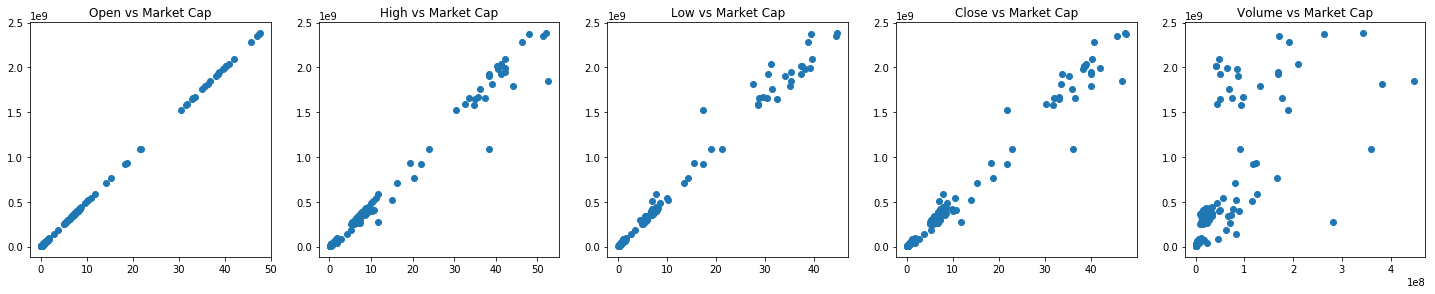

In [13]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
H = df['High']
L = df['Low']
C = df['Close']
V = df['Volume']
MC = df['Market Cap']

plt.subplot(5,5,1)
plt.scatter(O, MC)
plt.title('Open vs Market Cap')

plt.subplot(5,5,2)
plt.scatter(H, MC)
plt.title('High vs Market Cap')

plt.subplot(5,5,3)
plt.scatter(L, MC)
plt.title('Low vs Market Cap')

plt.subplot(5,5,4)
plt.scatter(C, MC)
plt.title('Close vs Market Cap')

plt.subplot(5,5,5)
plt.scatter(V, MC)
plt.title('Volume vs Market Cap')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the figure above we can see that Market Cap has linear condition with Open.

In [15]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:314]
Market_Cap = df['Market Cap'].iloc[0:314]

In [16]:
#Train model 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Market_Cap)

0.9999999752642066

In [18]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Market_Cap_Predict = model.predict(open)
df['Market Cap Predict'] = Market_Cap_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
357,2016-09-13,0.374469,0.375092,0.301766,0.309509,3337.0,NaN,1.872041e+07
358,2016-09-12,0.376312,0.376671,0.360443,0.374598,1116.0,NaN,1.881256e+07
359,2016-09-11,0.390948,0.398459,0.372790,0.376150,879.0,NaN,1.954437e+07
360,2016-09-10,0.558536,0.559143,0.370960,0.391001,811.0,NaN,2.792390e+07
361,2016-09-09,0.181483,0.558951,0.181357,0.558478,1349.0,NaN,9.070967e+06


Here I make a new column Market Cap Predict which contains Market Cap with no NaN value

In [19]:
df.count()

Date                  362
Open                  362
High                  362
Low                   362
Close                 362
Volume                362
Market Cap            315
Market Cap Predict    362
dtype: int64

The data is clean, no null value and has same format